In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from scipy.stats import pearsonr, spearmanr
from sklearn.manifold import TSNE

In [102]:
train=pd.read_csv(r'C:\Users\samhi\OneDrive - sjsu.edu\Documents\sjsu\Fall_24\ML\GWAR\Dataset\Actigraphy_extracted_features_Final.csv')

In [103]:
# Drop rows with missing values in any column
train = train.dropna()

In [104]:
# Drop rows with missing values in any column
data = data.dropna()

C:\Users\samhi\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\samhi\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:54:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65       116
         1.0       0.73      0.61      0.66       126
         2.0       0.78      0.89      0.83       114
         3.0       0.97      1.00      0.99       110

    accuracy                           0.78       466
   macro avg       0.78      0.79      0.78       466
weighted avg       0.78      0.78      0.78       466

Accuracy: 0.78
Micro-average ROC AUC Score: 0.93


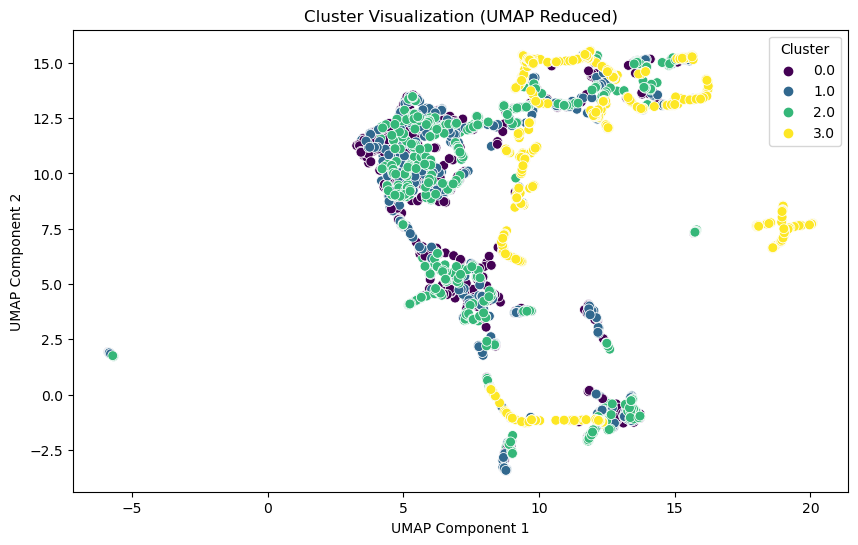

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from imblearn.over_sampling import ADASYN
import umap
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = train  # Assuming 'train' is your DataFrame

# Step 1: Replace 'Medium' with 1 and 'Low' with 0 in 'activity_level'
data['activity_level'] = data['activity_level'].map({'Medium': 1, 'Low': 0})

# Drop unnecessary columns
columns_to_drop = ['participant_id', 'sii']
data_numeric = data.drop(columns=columns_to_drop, axis=1)

# Features and target
X = data_numeric
y = data['sii']  # Use 'sii' for oversampling

# Step 2: Apply ADASYN for Oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Step 3: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 4: UMAP for Dimensionality Reduction (Optional, if needed for visualization)
umap_model = umap.UMAP(n_components=2, random_state=42)  # Reduce to 2 components
X_umap = umap_model.fit_transform(X_scaled)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Define and Train XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.2f}")

# Compute ROC AUC for each class
y_proba = xgb.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"Micro-average ROC AUC Score: {roc_auc:.2f}")

# Step 8: Visualize UMAP Clusters (Optional)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_resampled, palette='viridis', s=50)
plt.title('Cluster Visualization (UMAP Reduced)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()


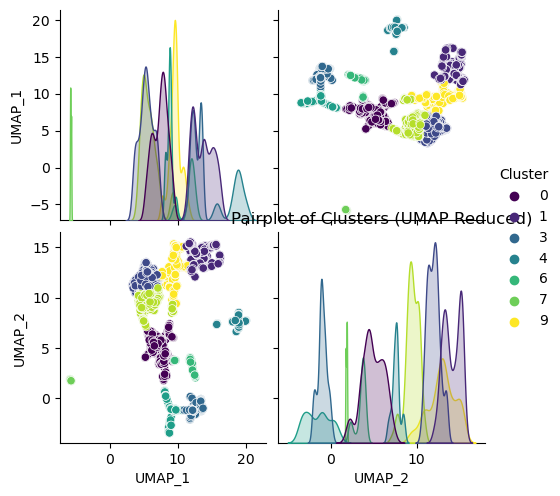

In [106]:
# Combine UMAP components and cluster labels
umap_df = pd.DataFrame(X_umap, columns=['UMAP_1', 'UMAP_2'])
umap_df['Cluster'] = clusters

# Pairplot for visualizing distributions and relationships
sns.pairplot(umap_df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.title('Pairplot of Clusters (UMAP Reduced)')
plt.show()


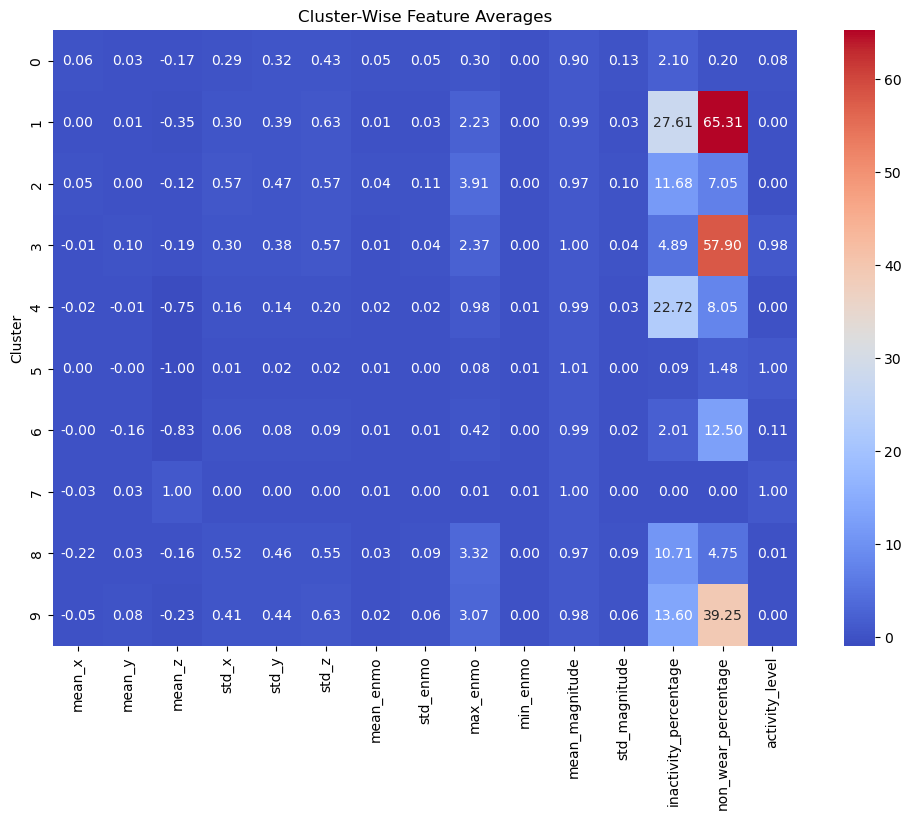

In [107]:
clustered_data = pd.DataFrame(X_resampled, columns=data_numeric.columns)
clustered_data['Cluster'] = clusters

# Compute mean feature values per cluster
cluster_means = clustered_data.groupby('Cluster').mean()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title('Cluster-Wise Feature Averages')
plt.show()

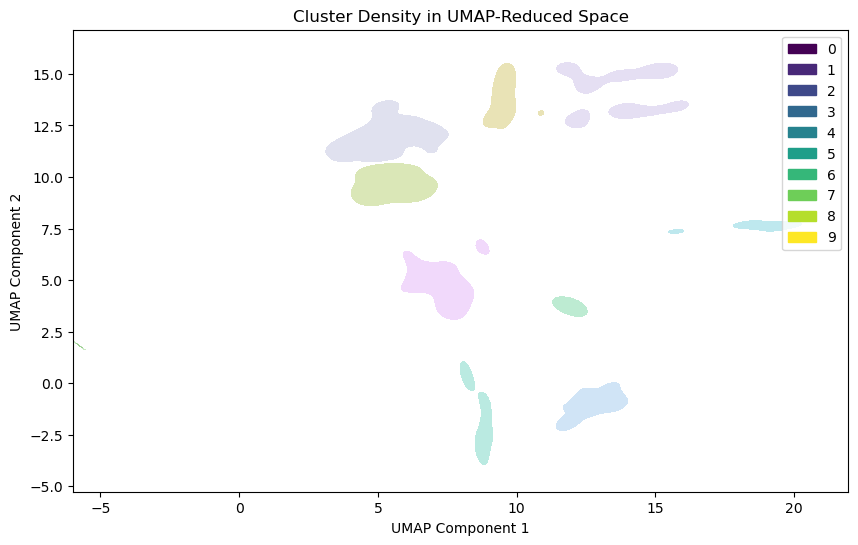

In [110]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette='viridis', fill=True, alpha=0.4)
plt.title('Cluster Density in UMAP-Reduced Space')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

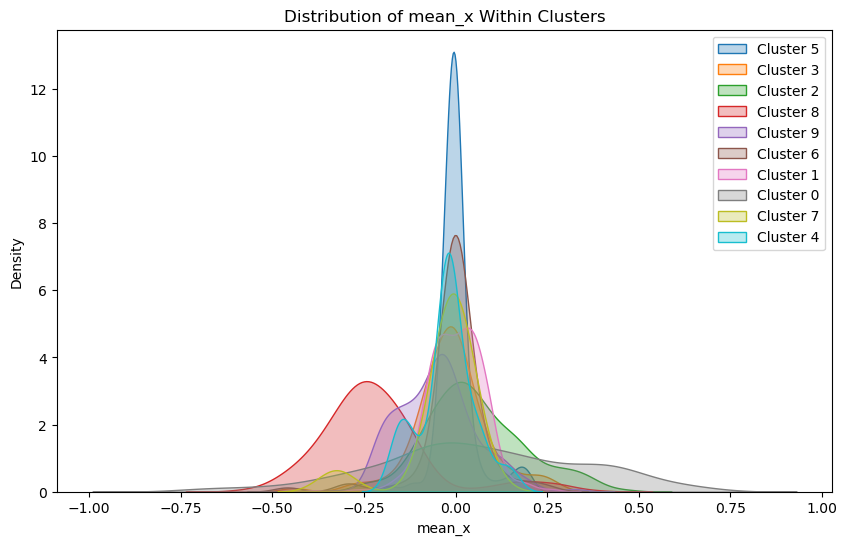

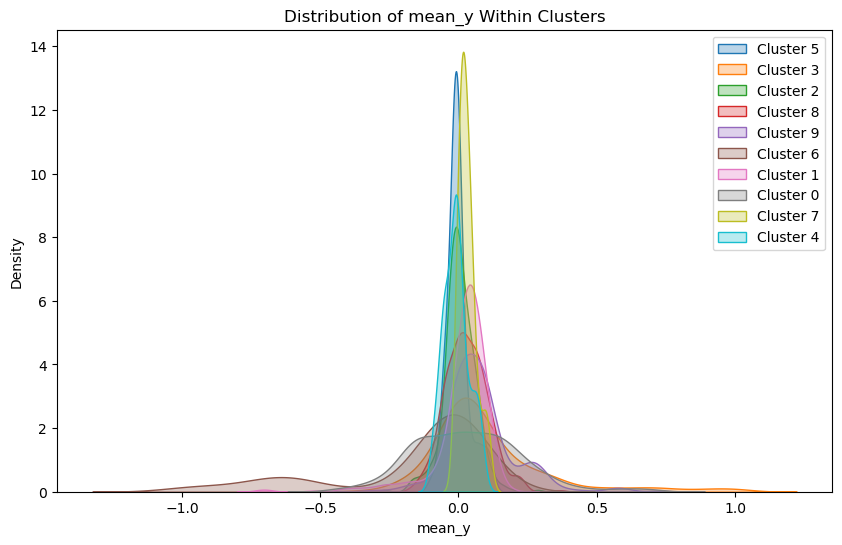

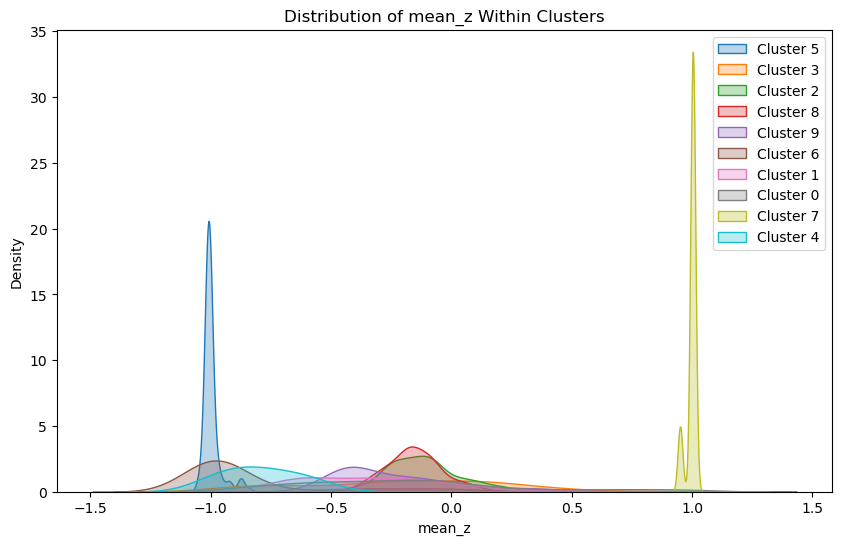

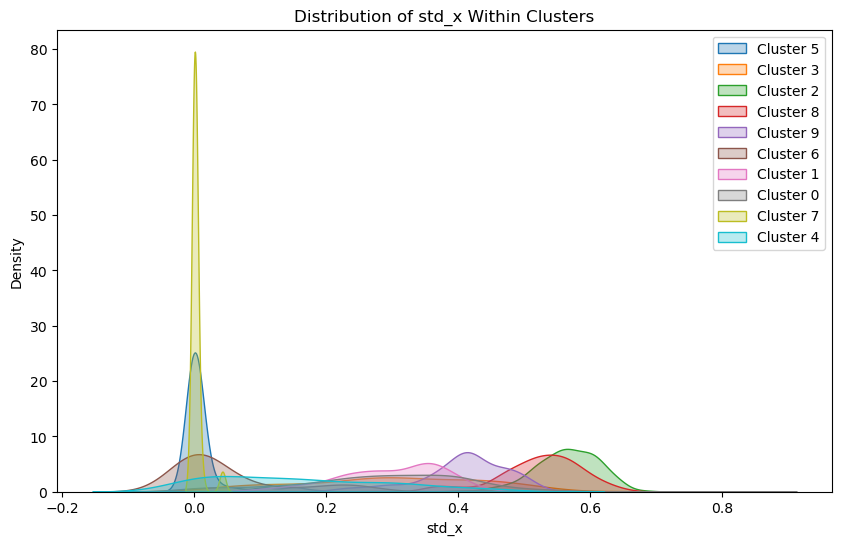

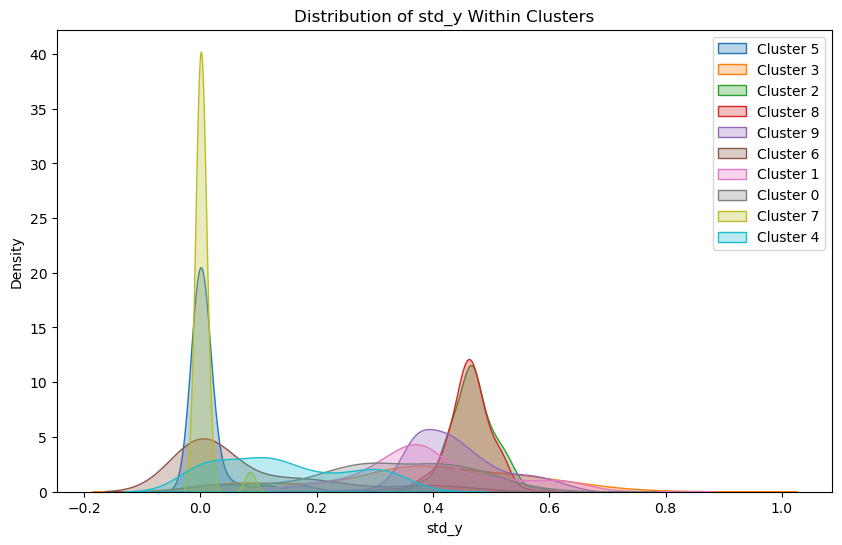

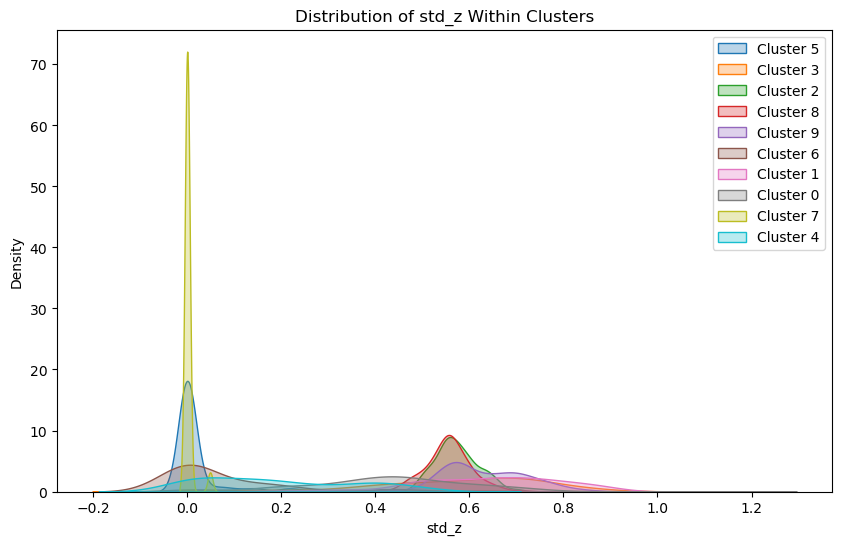

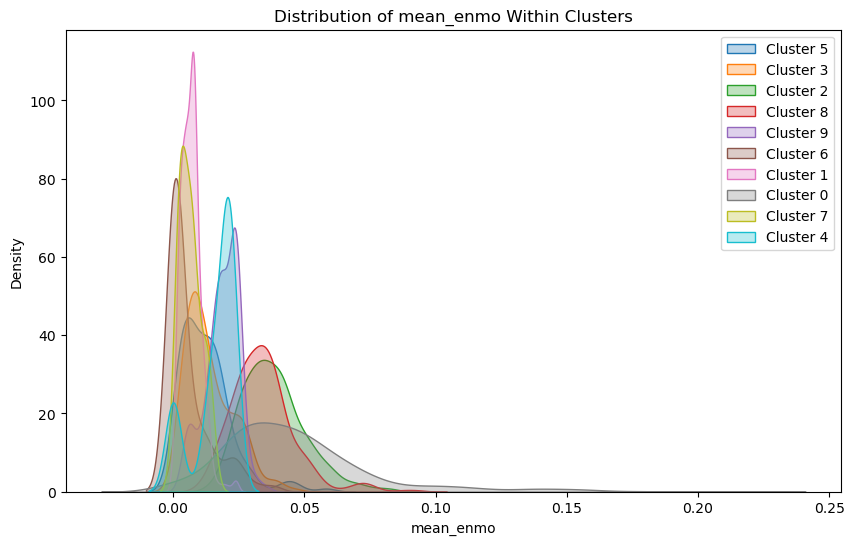

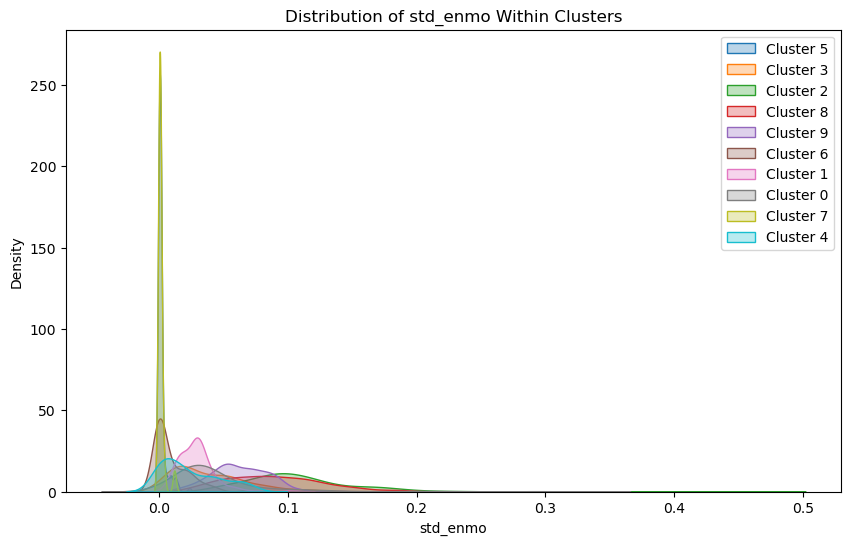

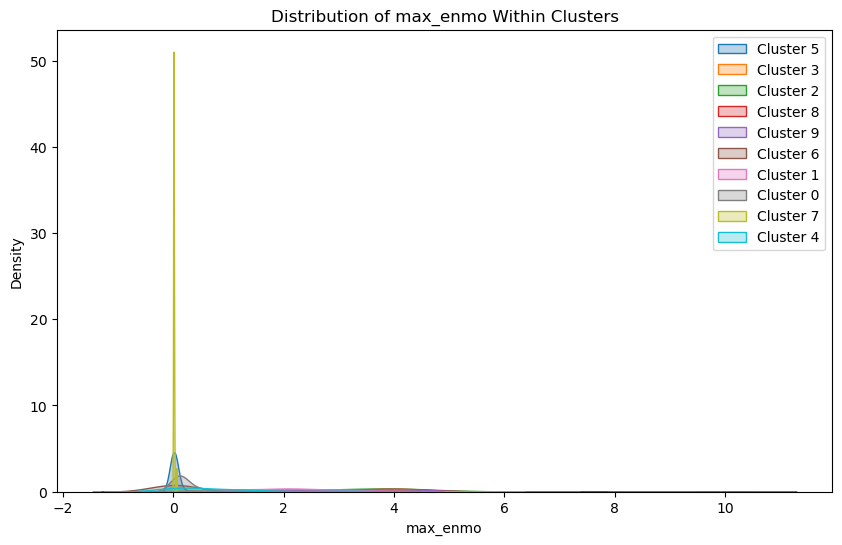

C:\Users\samhi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


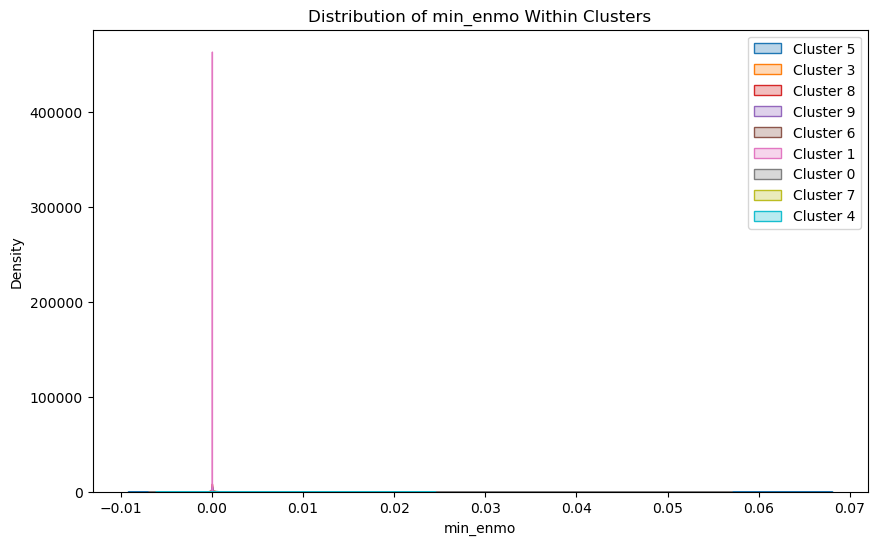

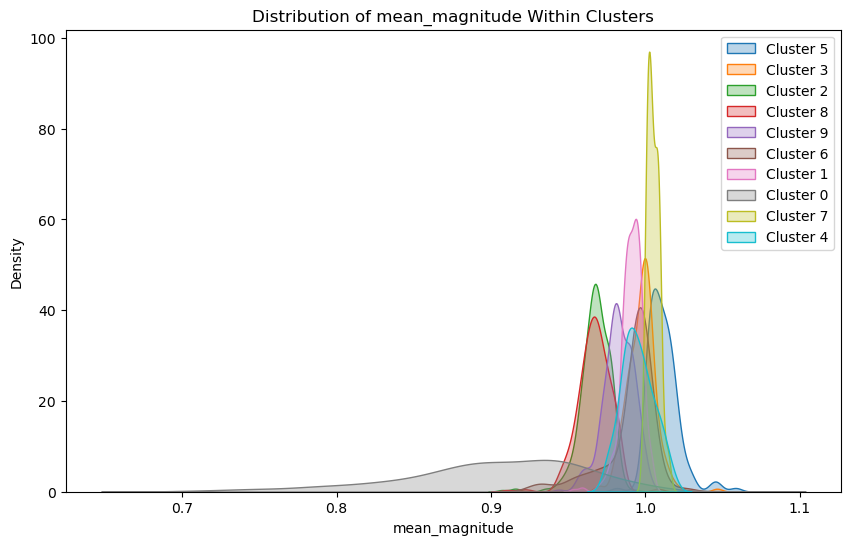

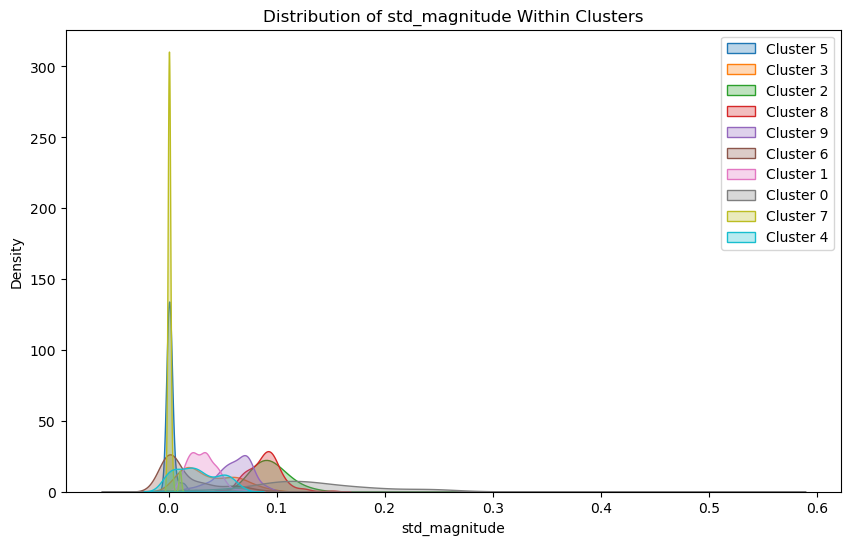

C:\Users\samhi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


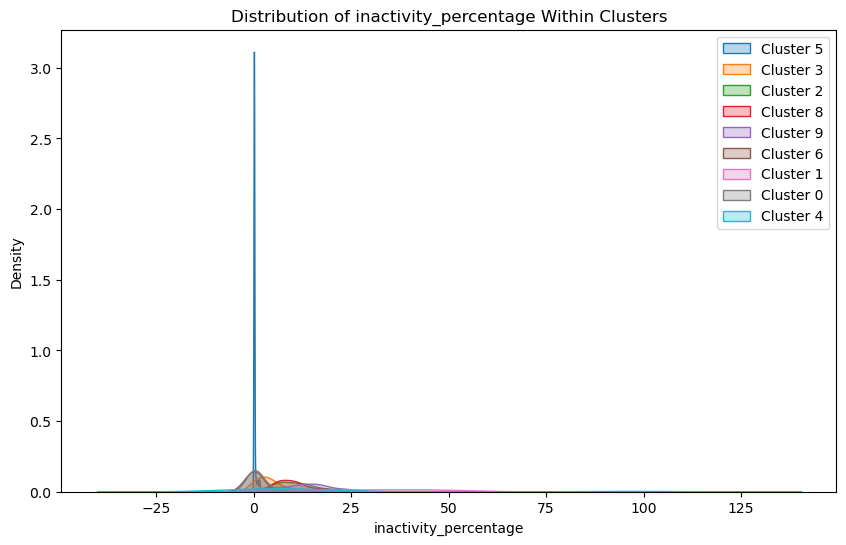

C:\Users\samhi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


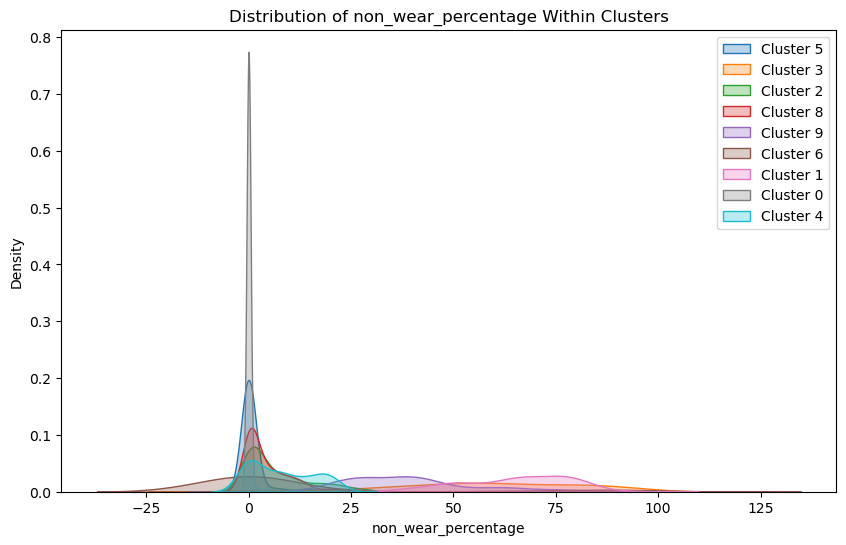

C:\Users\samhi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\samhi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\samhi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\samhi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\samhi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance

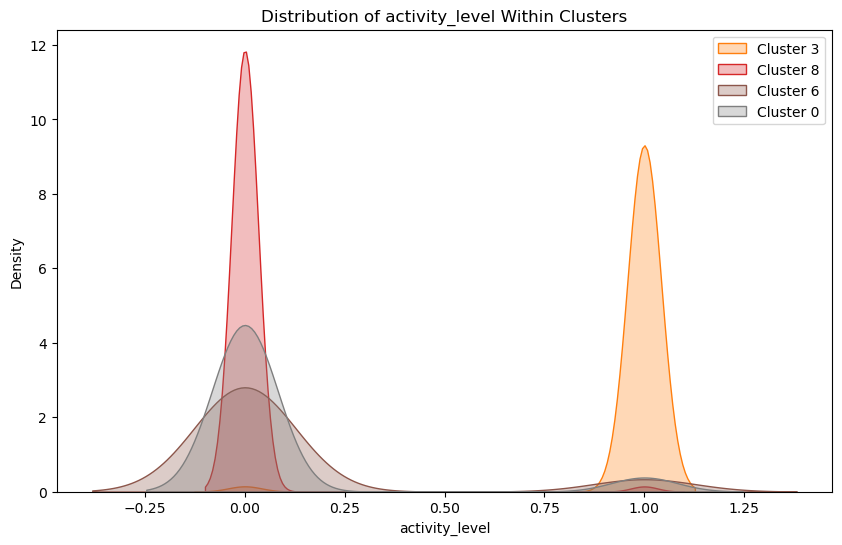

In [111]:
# Plot KDE for each feature within each cluster
for feature in data_numeric.columns:
    plt.figure(figsize=(10, 6))
    for cluster in clustered_data['Cluster'].unique():
        sns.kdeplot(
            clustered_data[clustered_data['Cluster'] == cluster][feature], 
            label=f'Cluster {cluster}', 
            fill=True, alpha=0.3
        )
    plt.title(f'Distribution of {feature} Within Clusters')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [74]:
data.shape

(994, 17)